<a href="https://colab.research.google.com/github/x-xinn/2106143_Yasin/blob/main/Selamat_Datang_di_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score


In [2]:
dataset = pd.read_csv('Automobile.csv')

print('Sampel Data :')
dataset.head()

Sampel Data :


,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1,18.0,8,307.0,130.0,3504,12.0,70,usa
1,2,15.0,8,350.0,165.0,3693,11.5,70,usa
2,3,18.0,8,318.0,150.0,3436,11.0,70,usa
3,4,16.0,8,304.0,150.0,3433,12.0,70,usa
4,5,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
dataset.isna().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [4]:
dataset.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [5]:
from re import X
x = dataset.iloc[:, :4]
y = dataset['origin']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)

dataset.dtypes

In [6]:
dt = DecisionTreeClassifier()


In [7]:

dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [8]:
print('Decision Tree Accuracy : {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy : 0.692


[Text(0.64, 0.9583333333333334, 'x[3] <= 121.5\ngini = 0.518\nsamples = 278\nvalue = [53, 45, 180]'),
 Text(0.36, 0.875, 'x[3] <= 97.25\ngini = 0.636\nsamples = 109\nvalue = [46, 42, 21]'),
 Text(0.2, 0.7916666666666666, 'x[0] <= 334.0\ngini = 0.51\nsamples = 50\nvalue = [21, 28, 1]'),
 Text(0.14, 0.7083333333333334, 'x[3] <= 87.0\ngini = 0.5\nsamples = 42\nvalue = [21, 21, 0]'),
 Text(0.08, 0.625, 'x[1] <= 35.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13, 0]'),
 Text(0.04, 0.5416666666666666, 'x[3] <= 69.0\ngini = 0.245\nsamples = 14\nvalue = [2, 12, 0]'),
 Text(0.02, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.06, 0.4583333333333333, 'x[3] <= 78.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12, 0]'),
 Text(0.04, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.08, 0.375, 'x[3] <= 79.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.06, 0.2916666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1, 0.2916666666666667, 'gi

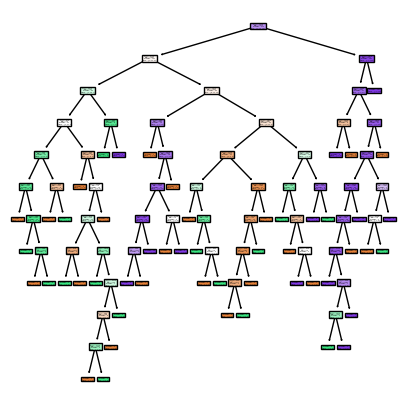

In [9]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt, filled=True)

In [11]:
kMeans = KMeans(n_clusters=3)
labels = kMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

0.7393883132896794


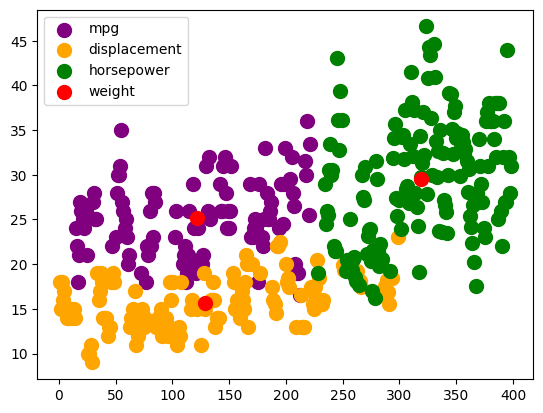

In [14]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
      x.loc[labels == 0, cols[1]], 
      s=100,c='purple',
      label='mpg')
plt.scatter(x.loc[labels == 1, cols[0]],
      x.loc[labels == 1, cols[1]], 
      s=100, c='orange',
      label='displacement')
plt.scatter(x.loc[labels == 2, cols[0]],
      x.loc[labels == 2, cols[1]], 
      s=100, c='green',
      label='horsepower')
plt.scatter(kMeans.cluster_centers_[:, 0],
      kMeans.cluster_centers_[:, 1],
      s=100, c='red',
      label='weight')
plt.legend()